<a href="https://colab.research.google.com/github/yakaHan/Tugas/blob/main/UTS%20BIG%20DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import requests
from bs4 import BeautifulSoup
import csv
import json

def scrape_books():
    base_url = "http://books.toscrape.com"
    current_page = 1
    all_books = []

    while True:
        print(f"Scraping page {current_page}...")
        url = f"{base_url}/catalogue/page-{current_page}.html"

        response = requests.get(url)

        # Jika halaman tidak ditemukan (404), keluar dari loop
        if response.status_code == 404:
            break

        soup = BeautifulSoup(response.text, 'html.parser')
        books = soup.find_all('article', class_='product_pod')

        for book in books:
            title = book.h3.a['title']
            price = book.find('p', class_='price_color').text
            rating = book.p['class'][1]  # Contoh: 'Three' untuk rating 3 bintang

            all_books.append({
                'title': title,
                'price': price,
                'rating': rating + ' stars'
            })

        current_page += 1

    return all_books

# Eksekusi scraping
books_data = scrape_books()

# Tampilkan 5 buku pertama sebagai contoh
for i, book in enumerate(books_data[:5], 1):
    print(f"Buku {i}:")
    print(f"Judul: {book['title']}")
    print(f"Harga: {book['price']}")
    print(f"Rating: {book['rating']}")
    print("-" * 50)

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [17]:
def save_data(books):
    # Simpan ke CSV
    with open('books_data.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=['title', 'price', 'rating'])
        writer.writeheader()
        writer.writerows(books)

    # Simpan ke JSON
    with open('books_data.json', 'w', encoding='utf-8') as f:
        json.dump(books, f, ensure_ascii=False, indent=2)

    print(f"Data {len(books)} buku berhasil disimpan!")

# Simpan data
save_data(books_data)

Data 1000 buku berhasil disimpan!


In [2]:
import tweepy
import pandas as pd
# Ganti dengan token Anda
bearer_token = 'YOUR_BEARER_TOKEN'

# Setup koneksi ke API
client = tweepy.Client(bearer_token=bearer_token)

# Kata kunci pencarian
query = 'ulasan produk OR review produk OR produk bagus -is:retweet lang:id'

# Ambil tweet (maks 100)
tweets = client.search_recent_tweets(query=query, tweet_fields=['created_at', 'author_id', 'text'], max_results=50)

# Simpan hasil ke DataFrame
tweet_data = []
for tweet in tweets.data:
    tweet_data.append({
        'Waktu': tweet.created_at,
        'User ID': tweet.author_id,
        'Teks': tweet.text
    })

df = pd.DataFrame(tweet_data)
print(df.head())


                      Waktu              User ID  \
0 2025-05-21 17:50:59+00:00  1237687807067320321   
1 2025-05-21 17:25:02+00:00   762689558769180673   
2 2025-05-21 17:01:14+00:00  1222052560904736768   
3 2025-05-21 16:52:10+00:00  1664929209033310209   
4 2025-05-21 15:56:44+00:00  1139334148886155265   

                                                Teks  
0  spill lip produk ombre yg bagus buat bibir pec...  
1           @perysaaa BNB emang bagus si produk nyaa  
2  tapi emng blm tentu produk viral bagus tuh coc...  
3  Ga mau mengomentari kondisi suatu produk / min...  
4  @The_RedsIndo barang dri bango market yg bagus...  


<ipython-input-19-9a6aedf41f14>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tweet_counts = df.resample('H').count()['Teks']


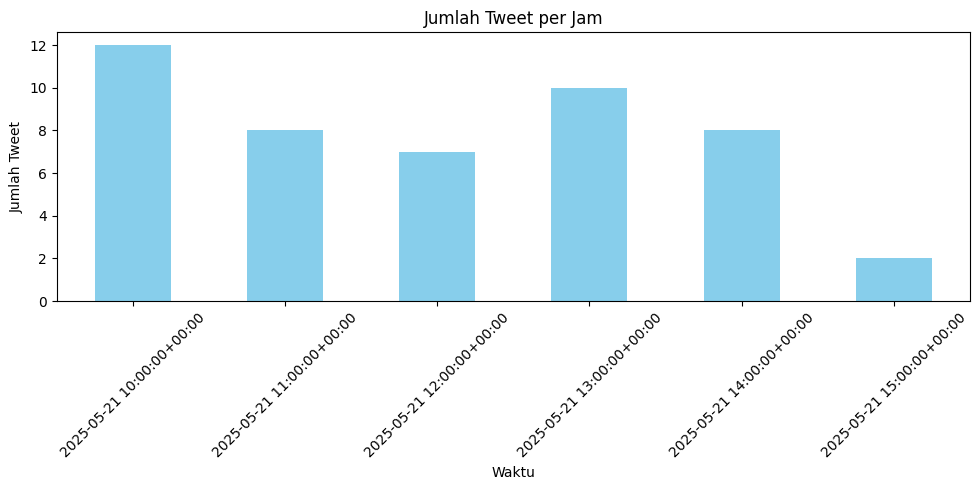

In [19]:
import matplotlib.pyplot as plt

# Konversi kolom waktu ke format datetime
df['Waktu'] = pd.to_datetime(df['Waktu'])

# Hitung jumlah tweet per jam
df.set_index('Waktu', inplace=True)
tweet_counts = df.resample('H').count()['Teks']

# Visualisasi
plt.figure(figsize=(10,5))
tweet_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Tweet per Jam')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Tweet')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/disney_plus_titles.csv")

In [27]:
import pandas as pd

# Contoh statistik deskriptif untuk kolom numerik (hanya 'release_year' dalam kasus ini)
print(df.describe())

# Statistik untuk kolom kategorikal (object)
print(df.describe(include='object'))

       release_year
count   1450.000000
mean    2003.091724
std       21.860162
min     1928.000000
25%     1999.000000
50%     2011.000000
75%     2018.000000
max     2021.000000
       show_id   type                                  title     director  \
count     1450   1450                                   1450          977   
unique    1450      2                                   1450          609   
top      s1450  Movie  Captain Sparky vs. The Flying Saucers  Jack Hannah   
freq         1   1052                                      1           17   

                  cast        country         date_added rating  duration  \
count             1260           1231               1447   1447      1450   
unique            1193             89                167      9       158   
top     Winston Hibler  United States  November 12, 2019   TV-G  1 Season   
freq                10           1005                722    318       219   

                        listed_in  \
count      

In [28]:
# Cek total missing value per kolom
print(df.isnull().sum())

# Persentase missing value
print(df.isnull().mean() * 100)

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64
show_id          0.000000
type             0.000000
title            0.000000
director        32.620690
cast            13.103448
country         15.103448
date_added       0.206897
release_year     0.000000
rating           0.206897
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


In [29]:
print(f"Total duplikat: {df.duplicated().sum()}")

Total duplikat: 0


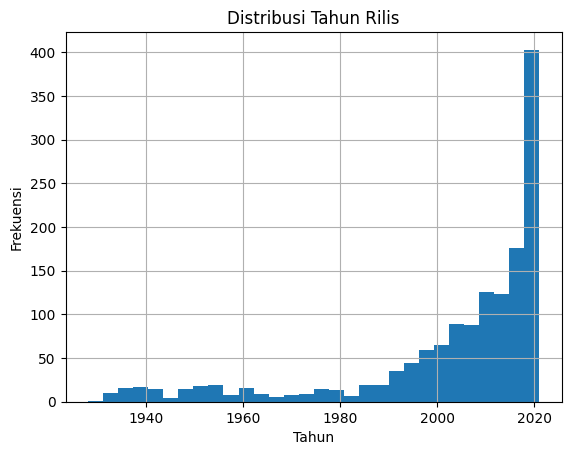

In [30]:
#Visualisasi Data
import matplotlib.pyplot as plt

df['release_year'].hist(bins=30)
plt.title('Distribusi Tahun Rilis')
plt.xlabel('Tahun')
plt.ylabel('Frekuensi')
plt.show()

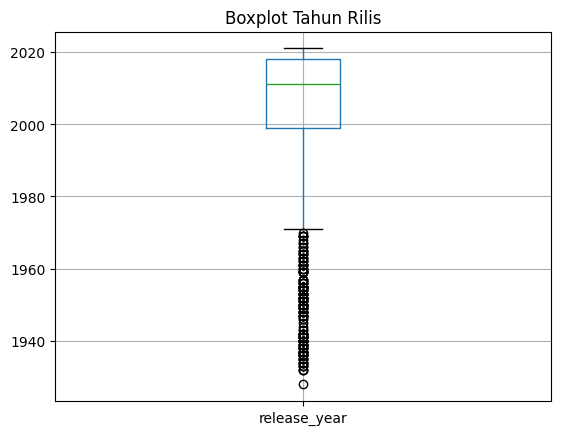

In [31]:
df.boxplot(column='release_year')
plt.title('Boxplot Tahun Rilis')
plt.show()

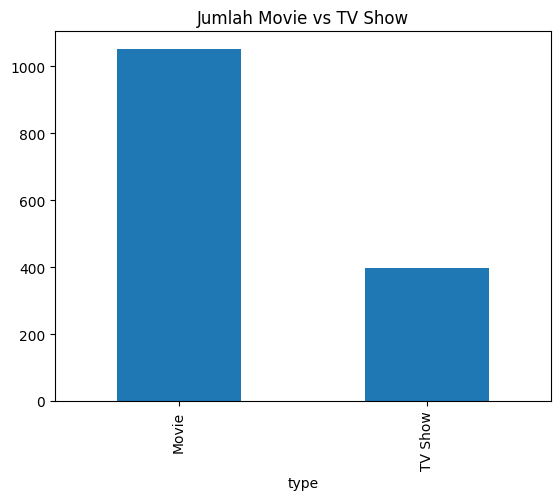

In [32]:
df['type'].value_counts().plot(kind='bar')
plt.title('Jumlah Movie vs TV Show')
plt.show()

Contoh dataset rating eksternal:
  show_id  imdb_rating
0      s1          7.8
1      s2          8.5
2      s3          6.5
3      s4          7.0
4      s5          8.9

Dataset gabungan (Disney+ dan Rating Eksternal):
  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anse

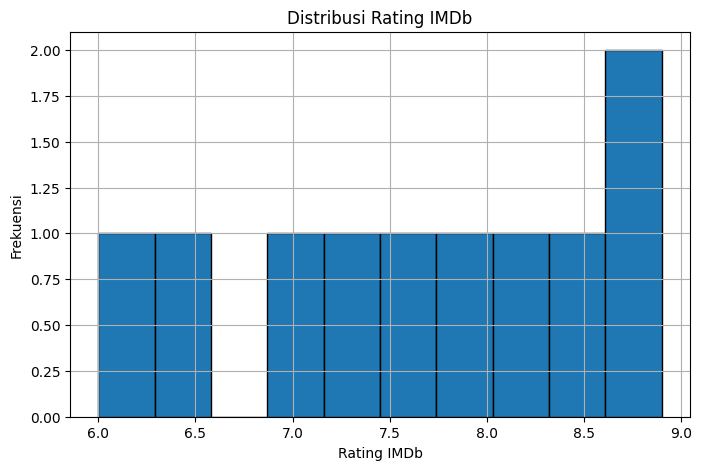

<Figure size 800x500 with 0 Axes>

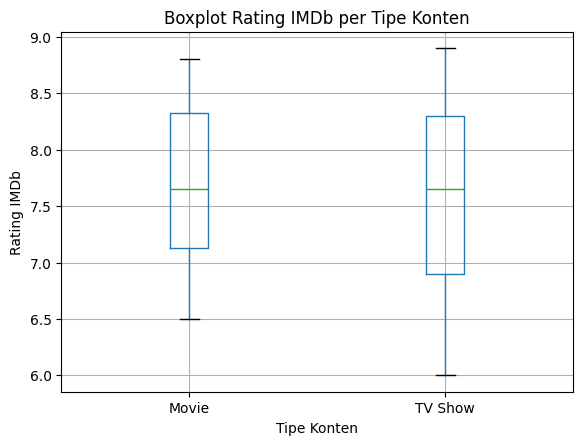


--- Temuan Menarik ---
- Terdapat kolom 'imdb_rating' baru yang berisi rating dari sumber eksternal.
- Ada sejumlah missing value pada kolom 'imdb_rating' karena tidak semua judul di dataset Disney+ memiliki rating di contoh dataset eksternal.
- Rata-rata rating IMDb adalah sekitar 7.63.

--- EDA Data Gabungan Selesai ---


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Cek apakah df saat ini adalah dataframe dan memiliki kolom 'show_id'
    if 'show_id' not in df.columns:
         df = pd.read_csv("/content/drive/MyDrive/disney_plus_titles.csv")
except NameError:
    # Jika df belum didefinisikan sama sekali
    df = pd.read_csv("/content/drive/MyDrive/disney_plus_titles.csv")
except AttributeError:
     # Jika df didefinisikan tapi bukan DataFrame
     df = pd.read_csv("/content/drive/MyDrive/disney_plus_titles.csv")


data_rating_eksternal = {
    'show_id': ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10'],
    'imdb_rating': [7.8, 8.5, 6.5, 7.0, 8.9, 7.5, 6.0, 8.1, 7.2, 8.8]
}
df_rating_eksternal = pd.DataFrame(data_rating_eksternal)

print("Contoh dataset rating eksternal:")
print(df_rating_eksternal.head())

df_gabungan = pd.merge(df, df_rating_eksternal, on='show_id', how='left')

print("\nDataset gabungan (Disney+ dan Rating Eksternal):")
print(df_gabungan.head())

print("\n--- Laporan EDA Data Gabungan ---")

# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(df_gabungan.describe(include='all'))

# Informasi Dataset Gabungan
print("\nInformasi Dataset Gabungan:")
print(df_gabungan.info())

# Cek Missing Values pada Data Gabungan
print("\nMissing Values per Kolom (Data Gabungan):")
print(df_gabungan.isnull().sum())

# Cek Duplikat pada Data Gabungan
print(f"\nTotal Duplikat (Data Gabungan): {df_gabungan.duplicated().sum()}")

# Analisis Distribusi Rating Eksternal
print("\nStatistik Deskriptif Rating IMDb:")
print(df_gabungan['imdb_rating'].describe())

# Visualisasi Distribusi Rating IMDb
plt.figure(figsize=(8, 5))
df_gabungan['imdb_rating'].hist(bins=10, edgecolor='black')
plt.title('Distribusi Rating IMDb')
plt.xlabel('Rating IMDb')
plt.ylabel('Frekuensi')
plt.show()

# Analisis Hubungan antara Tipe Konten (Movie/TV Show) dengan Rating IMDb
plt.figure(figsize=(8, 5))
df_gabungan.boxplot(column='imdb_rating', by='type')
plt.title('Boxplot Rating IMDb per Tipe Konten')
plt.xlabel('Tipe Konten')
plt.ylabel('Rating IMDb')
plt.suptitle('')
plt.show()

# Temuan Menarik:
print("\n--- Temuan Menarik ---")
print("- Terdapat kolom 'imdb_rating' baru yang berisi rating dari sumber eksternal.")
print("- Ada sejumlah missing value pada kolom 'imdb_rating' karena tidak semua judul di dataset Disney+ memiliki rating di contoh dataset eksternal.")
print(f"- Rata-rata rating IMDb adalah sekitar {df_gabungan['imdb_rating'].mean():.2f}.")

print("\n--- EDA Data Gabungan Selesai ---")